In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src.utils import load_json

# $D_{max}$ error cdfs

In [20]:
loaded_set = [load_json(f"../artifacts/embed_analysis/dmax_error_frac_swissprot_clean.json"),
              load_json(f"../artifacts/embed_analysis/dmax_error_frac_swissprot_esm.json")]

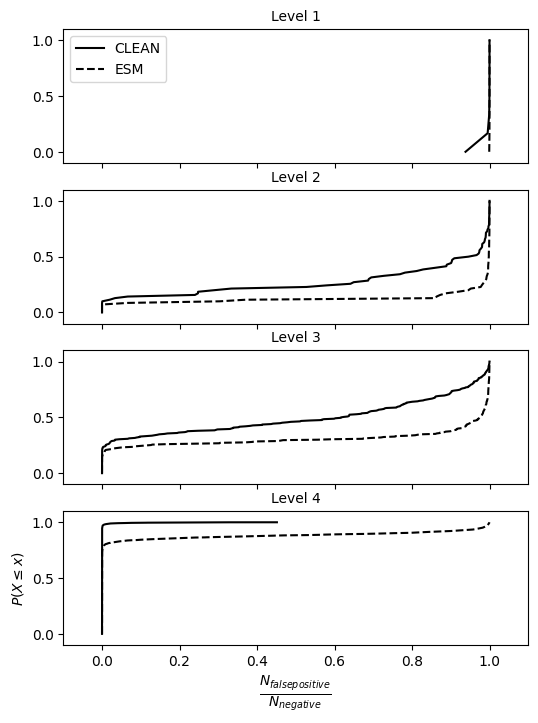

In [22]:
# Plot dmax error in cdfs
ep = 1e-1
n_levels = 4
fig, ax = plt.subplots(figsize=(6,8), nrows=n_levels, sharex=True, sharey=True)
colors = ['k', 'k', 'k', 'k']
linestyles = ['-', '--', '-', '--']
labels = ['CLEAN', 'ESM']
z = [128, 128, 1280, 1280] # n_dimensions

for j, elt in enumerate(loaded_set):
    for i,k in enumerate(elt.keys()):
        x = np.sort(elt[k])
        # x = np.sort(elt[k]) / z[j] # Normalize dmaxes by n_dimensions
        y = np.arange(len(x)) / (len(x) - 1)
        ax[i].plot(x, y, color=colors[j], label=labels[j], ls=linestyles[j])
        ax[i].set_title(f"Level {int(k)+1}", fontsize=10)

ax[-1].set_ylabel(r'$P(X \leq x)$')
# ax[-1].set_xlabel(r'$d_{max}$ / number of dimensions')
ax[-1].set_xlabel(r'$\frac{N_{false positive}}{N_{negative}}$', fontsize=14)
ax[0].set_ylim(-ep, 1 + ep)
ax[0].set_xlim(-ep, 1 + ep)
ax[0].legend()
plt.show()

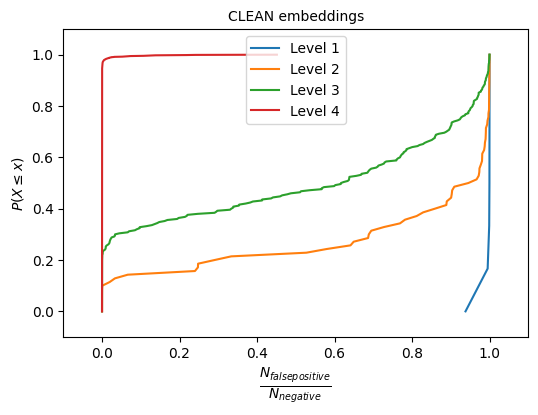

In [23]:
# Plot dmax error all curves 1 cdf with color labels
db = 'swissprot'
embed_type = 'clean'

# for_plot = load_json('../data/from_analysis/dmax_error_fracs_clean.json')
# for_plot = error_fracs
for_plot = load_json(f"../artifacts/embed_analysis/dmax_error_frac_{db}_{embed_type}.json")
ep = 1e-1
n_levels = 4
fig, ax = plt.subplots(figsize=(6,4))

for i,k in enumerate(for_plot.keys()):
    x = np.sort(for_plot[k])
    y = np.arange(len(x)) / (len(x) - 1)
    ax.plot(x, y, label=f"Level {int(k)+1}", ls='-')
    ax.set_title(f"CLEAN embeddings", fontsize=10)

ax.set_ylabel(r'$P(X \leq x)$')
ax.set_xlabel(r'$\frac{N_{false positive}}{N_{negative}}$', fontsize=14)
ax.set_ylim(-ep, 1 + ep)
ax.set_xlim(-ep, 1 + ep)
ax.legend()
plt.show()

# $n^{th}$-level error

In [37]:
# Load data

db = 'price'
embed_type = 'clean'

acc_path = f"../artifacts/embed_analysis/nth_level_accuracy_{db}_{embed_type}.json"
tot_path = f"../artifacts/embed_analysis/nth_level_totals_{db}_{embed_type}.json"
chance_path = f"../artifacts/embed_analysis/nth_level_chance_{db}_{embed_type}.json"
n_levels = 4

accuracy = load_json(acc_path)
total = load_json(tot_path)
chance = load_json(chance_path)

ecs_by_level = [[] for i in range(4)]
for k in accuracy.keys():
    ecs_by_level[len(k.split('.')) - 1].append(k)

In [38]:
# Arrange data for plot

# An array of data at each position of an n_levels
# length list
acc_arr = [[] for i in range(n_levels)] # Straight accuracy
rel_acc_arr = [[] for i in range(n_levels)] # Accuracy / chance accuracy
chance_arr = [[] for i in range(n_levels)] # Chance accuracy
err_by_chance_arr = [[] for i in range(n_levels)] # Chance error level
error_rate_arr = [[] for i in range(n_levels)] # Error rate
rel_err_arr = [[] for i in range(n_levels)] # Error rate / chance error
for l in range(n_levels):
    for elt in ecs_by_level[l]:
        if (elt in accuracy) & (elt in chance):
            acc_arr[l].append(accuracy[elt])
            rel_acc_arr[l].append((accuracy[elt] - chance[elt]) / chance[elt])
            chance_arr[l].append(chance[elt])
            err_by_chance_arr[l].append(1 - chance[elt])
            error_rate_arr[l].append(1 - accuracy[elt])
            rel_err_arr[l].append((1 - accuracy[elt]) / (1 - chance[elt]))

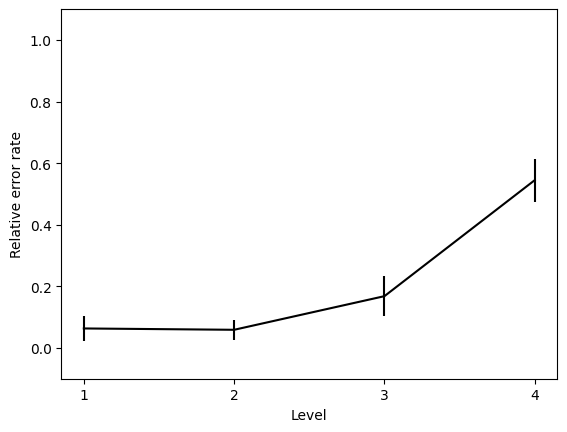

In [39]:
measure = rel_err_arr
ylabel = "Relative error rate"

level_arr = np.arange(1, n_levels+1)
ep = 1e-1
mean_measure = [np.array(elt).mean() for elt in measure]
sem_measure = [np.array(elt).std() / np.sqrt(len(elt)) for elt in measure]

fig, ax = plt.subplots()
ax.errorbar(level_arr, mean_measure, yerr=sem_measure, color='k')
ax.set_ylabel(ylabel)
ax.set_xlabel('Level')
ax.set_ylim(-ep, 1 + ep)
ax.set_xticks(level_arr)
plt.show()

# Masked label prediction accuracy

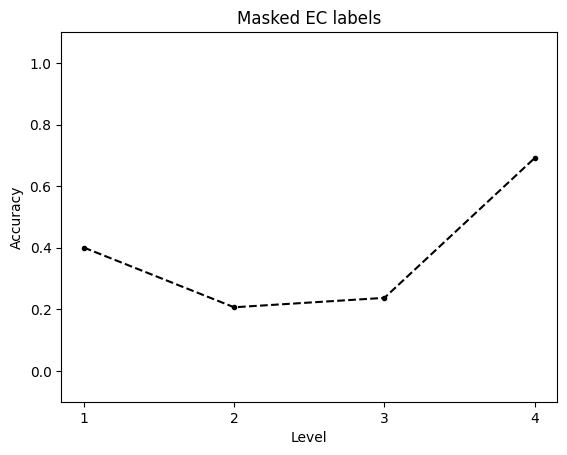

In [14]:
db = 'new'
embed_type = 'clean'

# Load data
mask_accuracy = []
with open(f"../artifacts/embed_analysis/masked_label_prediction_acc_{db}_{embed_type}.txt", 'r') as f:
    lines = f.readlines()
    for line in lines:
        mask_accuracy.append(float(line.strip()))

x = np.arange(1, n_levels + 1)
ep = 1e-1
fig, ax = plt.subplots()
ax.set_title("Masked EC labels")
ax.plot(x, mask_accuracy, 'k.--')
ax.set_ylim(-ep, 1 + ep)
ax.set_xticks(x)
ax.set_ylim(-ep, 1 + ep)
ax.set_xticks(x)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Level')
plt.show()